In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import requests
from fake_useragent import UserAgent
from pandas_profiling.profile_report import ProfileReport as pp

In [3]:
#Links
superseis = "https://superseis.com.py/search.aspx?searchterms="
casarica = "https://www.casarica.com.py/productos"
salemma = "https://www.salemmaonline.com.py/buscar?q="
stock = "https://www.stock.com.py/search.aspx?searchterms="

## Analisis Mercado Yerba Mate

## Competencia

#### Recoleccion de datos

In [4]:
competitors_yerba = []
brands = []
prices = []

In [5]:
# Superseis
class_item_box = "item-box"
class_brand = "product-brand"
class_price = "price-label"
superseis_list = []
for i in range(1,11):
    headers={'user-agent':UserAgent().random}
    url = superseis+"yerba mate"+f"&pageindex={i}"
    soup = BeautifulSoup(requests.get(url,headers=headers).text, 'html.parser')
    for el in soup.find_all("div",attrs={"class":class_item_box}):
        brand = re.sub("\n","",el.find("div",attrs={"class":class_brand}).text)
        price = int(el.find("span",attrs={"class":class_price}).text.replace(".",""))
        print("Brand: ",brand,"Price: ",price)         
        brands.append(brand)
        prices.append(price)
         

Brand:   Price:  10000
Brand:   Price:  9900
Brand:   Price:  5600
Brand:  KURUPI Price:  7300
Brand:  ABUELITA Price:  7800
Brand:  KURUPI Price:  5900
Brand:  CAMPESINO Price:  6800
Brand:  MICKEY Price:  6600
Brand:  PAJARITO Price:  18250
Brand:  INDEGA Price:  17200
Brand:  PAJARITO Price:  50000
Brand:   Price:  5600
Brand:   Price:  10000
Brand:  LA RUBIA Price:  41600
Brand:   Price:  12200
Brand:  KURUPI Price:  7950
Brand:  KURUPI Price:  12300
Brand:  TARAGUI Price:  26950
Brand:  TARAGUI Price:  50950
Brand:  TARAGUI Price:  14850
Brand:  TARAGUI Price:  31800
Brand:  COLON Price:  19100
Brand:  COLON Price:  52500
Brand:  TARAGUI Price:  28750
Brand:  CAMPESINO Price:  8200
Brand:  CAMPESINO Price:  4500
Brand:  NORTE Price:  15500
Brand:   Price:  10200
Brand:  CAMPESINO Price:  6500
Brand:  NORTE Price:  4200
Brand:  INDEGA Price:  10300
Brand:  SELECTA Price:  17500
Brand:  COLON Price:  6000
Brand:  SELECTA Price:  34000
Brand:  SELECTA Price:  8100
Brand:  COLON Price

In [6]:
#Casarica
class_container = "product"
class_brand = "ecommercepro-loop-product__title"
class_price = "price"
for i in range(1,7):
    headers={'user-agent':UserAgent().random}
    url = casarica+"."+str(i)+"?q="+"yerba"
    soup = BeautifulSoup(requests.get(url,headers=headers).text, 'html.parser')
    for el in soup.find_all("div",attrs={"class":class_container}):
        brand = re.sub(r"YERBA MATE |YERBA ","",re.search(r"YERBA\sMATE\sLA\s\w{1,10}|YERBA\sLA\s\w{1,10}|YERBA MATE \w{1,10}|YERBA \w{1,10}",el.find("h2",attrs={"class":class_brand}).text).group())
        price = int(re.search(r"\d{1,3}.\d{3}",el.find("span",attrs={"class":class_price}).text).group().replace(".",""))
        print("Brand: ",brand,"Price: ",price) 
        brands.append(brand)
        prices.append(price)
    

Brand:  ITABO Price:  10500
Brand:  KURUPI Price:  7150
Brand:  KURUPI Price:  12300
Brand:  KURUPI Price:  6350
Brand:  KURUPI Price:  11250
Brand:  KURUPI Price:  35000
Brand:  CAMPESINO Price:  16500
Brand:  CAMPESINO Price:  4500
Brand:  CAMPESINO Price:  8200
Brand:  CAMPESINO Price:  12000
Brand:  CAMPESINO Price:  6800
Brand:  CAMPESINO Price:  7000
Brand:  CAMPESINO Price:  11900
Brand:  CAMPESINO Price:  12000
Brand:  CAMPESINO Price:  6500
Brand:  CAMPESINO Price:  10950
Brand:  CAMPESINO Price:  6000
Brand:  CAMPESINO Price:  12000
Brand:  CAMPESINO Price:  7500
Brand:  CAMPESINO Price:  11300
Brand:  CAMPESINO Price:  6500
Brand:  CAMPESINO Price:  11500
Brand:  CAMPESINO Price:  10600
Brand:  CAMPESINO Price:  6800
Brand:  CAMPESINO Price:  12000
Brand:  COLON Price:  12150
Brand:  COLON Price:  11450
Brand:  COLON Price:  12000
Brand:  COLON Price:  11300
Brand:  COLON Price:  9750
Brand:  COLON Price:  10000
Brand:  COLON Price:  18950
Brand:  FD Price:  9650
Brand:  FD 

In [7]:
#Salemma
class_container = "col-lg-3 col-md-4 col-sm-4 col-6 pdivp div-product-list"
class_price = "pprice"
class_brand = "ptitle"
for i in range(1,5):
    headers={'user-agent':UserAgent().random}
    url = salemma+"yerba"+f"&page={i}"
    soup = BeautifulSoup(requests.get(url,headers=headers).text, 'html.parser')
    for el in soup.find_all("div",attrs={"class":class_container}):
        brand = el.find("h6",attrs={"class":class_brand}).text.strip()
        price =int(re.sub("Gs. ","",el.find("h6",attrs={"class":class_price}).text.strip()).replace(".",""))
        print("Brand: ",brand,"Price: ",price) 
        brands.append(brand)
        prices.append(price)
    

Brand:  LA RUBIA Price:  39900
Brand:  LA RUBIA Price:  20400
Brand:  CAMPESINO Price:  11500
Brand:  CAMPESINO Price:  6500
Brand:  CAMPESINO Price:  9000
Brand:  CAMPESINO Price:  6800
Brand:  CAMPESINO Price:  12000
Brand:  CAMPESINO Price:  6500
Brand:  CAMPESINO Price:  11500
Brand:  CAMPESINO Price:  12500
Brand:  CAMPESINO Price:  7000
Brand:  CAMPESINO Price:  12000
Brand:  CAMPESINO Price:  6800
Brand:  CAMPESINO Price:  12900
Brand:  CAMPESINO Price:  7500
Brand:  CAMPESINO Price:  6800
Brand:  CAMPESINO Price:  12000
Brand:  CAMPESINO Price:  6000
Brand:  CAMPESINO Price:  10950
Brand:  CAMPESINO Price:  12000
Brand:  CAMPESINO Price:  6800
Brand:  CAMPESINO Price:  12000
Brand:  CAMPESINO Price:  2400
Brand:  CAMPESINO Price:  4500
Brand:  CAMPESINO Price:  16500
Brand:  CAMPESINO Price:  9000
Brand:  CHE RA´A Price:  10500
Brand:  KURUPI Price:  12500
Brand:  KURUPI Price:  7100
Brand:  KURUPI Price:  11250
Brand:  KURUPI Price:  6350
Brand:  KURUPI Price:  7850
Brand:  KU

In [8]:
#Stock
class_container = "col-lg-2 col-md-3 col-sm-4 col-xs-6 producto"
class_brand = "product-brand"
class_price = "price-label"
subbrands = []
subprices = []
for i in range(1,11):
    headers={'user-agent':UserAgent().random}
    url = stock+"yerba"+f"&pageindex={i}"
    soup = BeautifulSoup(requests.get(url,headers=headers).text, 'html.parser')
    for el in soup.find_all("div",attrs={"class":class_container}):
        brand =  el.find("div",attrs={"class":class_brand}).text.strip()
        price = int(el.find("span",attrs={"class":class_price}).text.strip().replace(".",""))
        print("Brand: ",brand,"Price: ",price) 
        subbrands.append(brand)
        subprices.append(price)
brands.append(i for i in subbrands if i != "")
prices.append(i for i in subprices)


Brand:  KURUPI Price:  12500
Brand:  PAJARITO Price:  9500
Brand:  PAJARITO Price:  11050
Brand:  KURUPI Price:  12300
Brand:  INDEGA Price:  17300
Brand:  CAMPESINO Price:  6000
Brand:  CAMPESINO Price:  10950
Brand:   Price:  11900
Brand:  COLON Price:  6000
Brand:  LA RUBIA Price:  21250
Brand:  COLON Price:  10100
Brand:  CAMPESINO Price:  6500
Brand:  KURUPI Price:  14200
Brand:  COLON Price:  19100
Brand:  ABUELITA Price:  9500
Brand:  TARAGUI Price:  14850
Brand:  TARAGUI Price:  26950
Brand:  PAJARITO Price:  24550
Brand:  COLON Price:  13100
Brand:  PAJARITO Price:  18350
Brand:  KURUPI Price:  7100
Brand:  NORTE Price:  4200
Brand:  KURUPI Price:  11250
Brand:  KURUPI Price:  12300
Brand:   Price:  12000
Brand:   Price:  8400
Brand:   Price:  3300
Brand:  KURUPI Price:  5900
Brand:   Price:  9000
Brand:   Price:  12100
Brand:  KURUPI Price:  7300
Brand:  PAJARITO Price:  18250
Brand:  KURUPI Price:  7950
Brand:  PAJARITO Price:  4900
Brand:  ABUELITA Price:  7250
Brand:   Pri

In [9]:
competitors_yerba.append(brands)
competitors_yerba.append(prices)

In [112]:
len(competitors_yerba) == 2

True

### Analisis

In [10]:
df = pd.DataFrame(competitors_yerba).transpose()
df.columns = ['Marca', 'Precio']
df

Marca  \
0                                                     
1                                                     
2                                                     
3                                            KURUPI   
4                                          ABUELITA   
..                                              ...   
511                                     LA VICTORIA   
512                                     LA VICTORIA   
513                                     LA VICTORIA   
514                                     LA VICTORIA   
515  <generator object <genexpr> at 0x7fce41427680>   

                                             Precio  
0                                             10000  
1                                              9900  
2                                              5600  
3                                              7300  
4                                              7800  
..                                              ...  
511                                           14650  
512                                           14650  
513                                           14650  
514                                           14650  
515  <generator object <genexpr> at 0x7fce41427760>  

[516 rows x 2 columns]

In [11]:
df = df[df["Marca"] != ""]

In [12]:
df["Marca"] = df["Marca"].replace("LA VICTORIA MASTER BLEND","LA VICTORIA") 
df["Marca"] = df["Marca"].replace("ARCO IRIS","ARCOIRIS") 

/tmp/ipykernel_66078/3877453207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marca"] = df["Marca"].replace("LA VICTORIA MASTER BLEND","LA VICTORIA")
/tmp/ipykernel_66078/3877453207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marca"] = df["Marca"].replace("ARCO IRIS","ARCOIRIS")


In [13]:
df = df[df.groupby("Marca")['Marca'].transform('count') > 3]

In [117]:
df["Marca"].value_counts()

INDEGA         65
CAMPESINO      56
KURUPI         51
COLON          41
SELECTA        41
PAJARITO       24
TARAGUI        19
LA VICTORIA    19
NORTE           9
LA RUBIA        6
FD              6
ABUELITA        4
MICKEY          4
ITABO           4
ARCOIRIS        4
Name: Marca, dtype: int64

In [14]:
array = df["Marca"].value_counts().to_dict()
y=list(array.keys())
x=list(array.values())

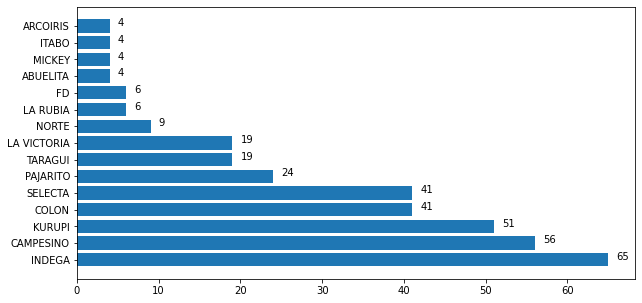

In [119]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.barh(y,x,align="center")
for i,v in enumerate(x):
    ax.text(v+1,i,str(v))
plt.show()
fig.savefig('./Competencia_Yerba.png')

In [120]:
df["Precio"].mean()

13060.339943342777

In [15]:
df.to_csv("./Competencia_Yerba_Mate.csv")